In [1]:
from platform import python_version
print('Puthon '+python_version())

Puthon 3.9.15


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_excel("Bancodedados_Internações_morbidade_transt mentais_enriquecido.xlsx")
df.drop('Código', axis=1, inplace=True)

In [4]:
df.head()

,Município,Mesorregião,Média de idade,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,Total
0,ABADIA DOS DOURADOS,Triângulo Mineiro/Alto Paranaíba,12.0,0,0,0,0,1,0,0,0,1
1,AGUAS VERMELHAS,Norte de Minas,15.0,0,1,0,0,0,0,0,0,1
2,AMPARO DO SERRA,Zona da Mata,70.0,0,0,0,0,0,0,0,1,1
3,ARACAI,Metropolitana de Belo Horizonte,16.0,0,0,0,0,0,1,0,0,1
4,ARACITABA,Zona da Mata,17.0,0,1,0,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Município       660 non-null    object 
 1   Mesorregião     660 non-null    object 
 2   Média de idade  659 non-null    float64
 3   10 a 14 anos    660 non-null    int64  
 4   15 a 19 anos    660 non-null    int64  
 5   20 a 29 anos    660 non-null    int64  
 6   30 a 39 anos    660 non-null    int64  
 7   40 a 49 anos    660 non-null    int64  
 8   50 a 59 anos    660 non-null    int64  
 9   60 a 69 anos    660 non-null    int64  
 10  70 a 79 anos    660 non-null    int64  
 11  Total           660 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 62.0+ KB


In [6]:
df.isnull().sum()

Município         0
Mesorregião       0
Média de idade    1
10 a 14 anos      0
15 a 19 anos      0
20 a 29 anos      0
30 a 39 anos      0
40 a 49 anos      0
50 a 59 anos      0
60 a 69 anos      0
70 a 79 anos      0
Total             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Município,Mesorregião,Média de idade,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,Total
434,TUPACIGUARA,Triângulo Mineiro/Alto Paranaíba,NaN,0,2,0,3,2,0,0,0,7


In [8]:
def describe_with_mode(df):
    description = df.describe().transpose()
    
    # Calcula a moda para cada coluna e adiciona ao DataFrame de descrição
    modes = {}
    for column in df.columns:
        modes[column] = df[column].mode()
        
    # Constrói um DataFrame com as modas
    mode_df = pd.DataFrame({col: modes[col].values[0] for col in modes}, index=['mode']).transpose()
    
    # Junta a moda com as estatísticas descritivas
    description = description.join(mode_df)
    
    return description.transpose()

describe_with_mode(df)

,Média de idade,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,Total
count,659.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0
mean,40.731411,0.459091,1.318182,3.215152,3.369697,3.139394,2.125758,1.033333,0.493939,15.154545
std,19.127768,1.651732,4.284493,9.908339,10.077529,9.466431,6.22133,3.077962,2.146026,43.459332
min,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
50%,34.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0
75%,62.0,0.0,1.0,2.25,3.0,2.0,2.0,1.0,0.0,11.0
max,78.0,30.0,67.0,169.0,124.0,106.0,77.0,30.0,31.0,576.0
mode,66.0,0,0,0,0,0,0,0,0,1


In [9]:
df_muni = df[['Município','Total']].sort_values('Total', ascending=False).rename(columns={'Total':'Internações'}).reset_index()
df_muni['Frequência relativa'] = df_muni['Internações']/df_muni['Internações'].sum()
df_muni.drop('index',axis=1,inplace=True)
df_muni.head(10)

,Município,Internações,Frequência relativa
0,MONTES CLAROS,576,0.057588
1,UBERLANDIA,449,0.044891
2,UBERABA,407,0.040692
3,JUIZ DE FORA,341,0.034093
4,BELO HORIZONTE,288,0.028794
5,IPATINGA,287,0.028694
6,MURIAE,224,0.022396
7,POUSO ALEGRE,168,0.016797
8,JANAUBA,150,0.014997
9,BARBACENA,146,0.014597


k = 23.0


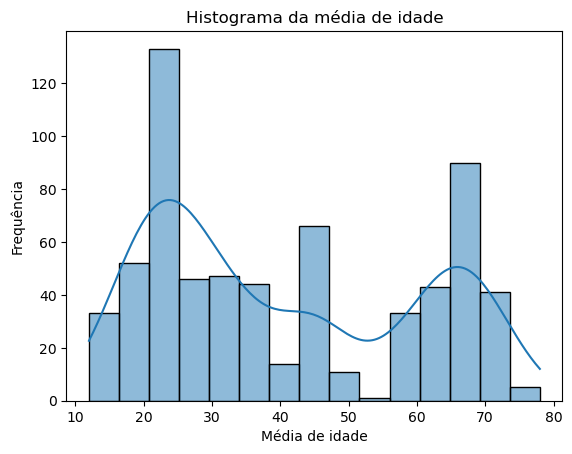

In [10]:
struges = (1 + 3.322*np.log(df['Média de idade'].count())).round(0)
print(f'k = {struges}')
fig = sns.histplot(data=df, x="Média de idade", bins=15, kde=True)
plt.xlabel("Média de idade")
plt.ylabel("Frequência")
plt.title("Histograma da média de idade") # You can comment this line out if you don't need title
plt.show(fig)

k = 23.0


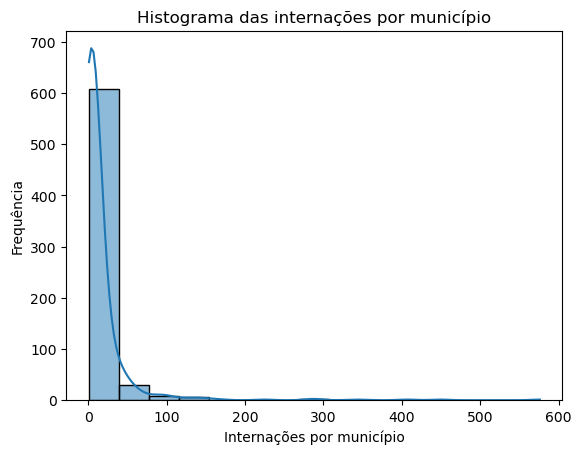

In [11]:
struges = (1 + 3.322*np.log(df.Total.count())).round(0)
print(f'k = {struges}')
fig = sns.histplot(data=df, x="Total", bins=15, kde=True)
plt.xlabel("Internações por município")
plt.ylabel("Frequência")
plt.title("Histograma das internações por município") # You can comment this line out if you don't need title
plt.show(fig)

In [12]:
df_meso = df[['Mesorregião','Total']].groupby(['Mesorregião']).agg(['sum'])
df_meso = df_meso.droplevel(0, axis=1).sort_values('sum', ascending=False).reset_index().rename(columns={'sum':'Internações'})
df_meso

,Mesorregião,Internações
0,Metropolitana de Belo Horizonte,1665
1,Triângulo Mineiro/Alto Paranaíba,1603
2,Zona da Mata,1465
3,Norte de Minas,1252
4,Vale do Rio Doce,1105
5,Sul/Sudoeste de Minas,1081
6,Jequitinhonha,610
7,Central Mineira,369
8,Oeste de Minas,304
9,Campo das Vertentes,277


In [13]:
df_meso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Mesorregião  12 non-null     object
 1   Internações  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


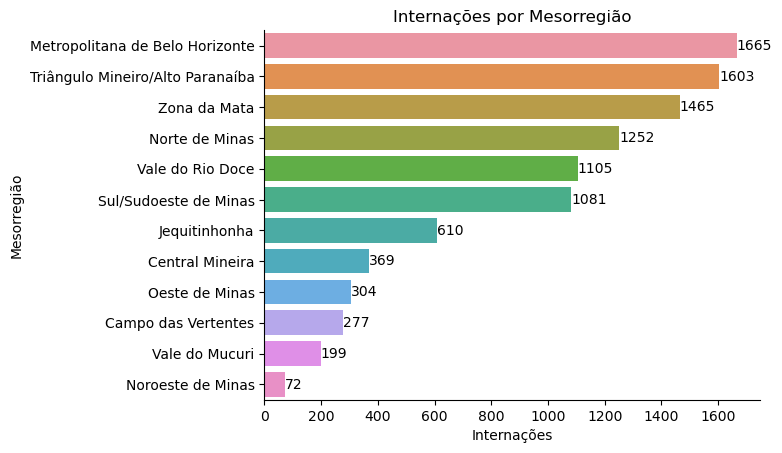

In [14]:
ax = sns.barplot(df_meso, x="Internações", y="Mesorregião")
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Internações por Mesorregião") 
sns.despine()

In [15]:
df.sum()

Município         ABADIA DOS DOURADOSAGUAS VERMELHASAMPARO DO SE...
Mesorregião       Triângulo Mineiro/Alto ParanaíbaNorte de Minas...
Média de idade                                              26842.0
10 a 14 anos                                                    303
15 a 19 anos                                                    870
20 a 29 anos                                                   2122
30 a 39 anos                                                   2224
40 a 49 anos                                                   2072
50 a 59 anos                                                   1403
60 a 69 anos                                                    682
70 a 79 anos                                                    326
Total                                                         10002
dtype: object

In [16]:
df_age = df[['10 a 14 anos','15 a 19 anos','20 a 29 anos','30 a 39 anos','40 a 49 anos','50 a 59 anos','60 a 69 anos','70 a 79 anos']].sum()
df_age = pd.DataFrame(df_age).reset_index().rename(columns={'index':'Faixa Etária',0:'Internações'})
df_age

,Faixa Etária,Internações
0,10 a 14 anos,303
1,15 a 19 anos,870
2,20 a 29 anos,2122
3,30 a 39 anos,2224
4,40 a 49 anos,2072
5,50 a 59 anos,1403
6,60 a 69 anos,682
7,70 a 79 anos,326


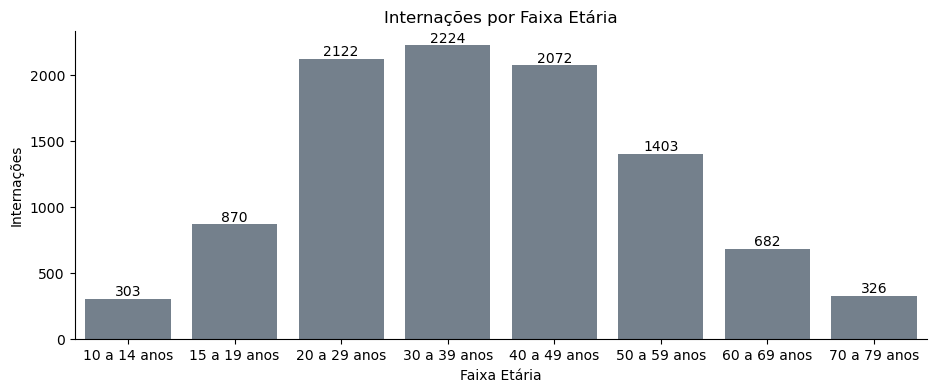

In [17]:
plt.figure(figsize=(11,4))
ax = sns.barplot(df_age, y="Internações", x="Faixa Etária", color='slategray')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set_title("Internações por Faixa Etária") 
sns.despine()

In [18]:
df[['Média de idade','Total']].corr()

,Média de idade,Total
Média de idade,1.000000,0.358004
Total,0.358004,1.000000


In [19]:
import pandas as pd
from scipy.stats import pearsonr
df_corr = df[['Média de idade','Total']].dropna()
pearsonr(df_corr['Média de idade'], df_corr['Total'])

PearsonRResult(statistic=0.3580043741240898, pvalue=2.3283560631980835e-21)